In [1]:
#필요한 라이브러리 불러오기
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
use = pd.read_csv('D:/Programming/Jupyter/02.data/local_currency/use.csv', encoding='cp949')    # 지역화폐발행 및 이용현황
agegender = pd.read_csv('D:/Programming/Jupyter/02.data/local_currency/age_gender.csv', encoding='cp949')    # 지역화폐 연령/성별 이용현황 
store = pd.read_csv('D:/Programming/Jupyter/02.data/local_currency/store.csv', encoding='cp949')    # 지역화폐 가맹점 현황
people = pd.read_csv('D:/Programming/Jupyter/02.data/local_currency/시군_연령별_인구.csv', encoding='cp949')    # 경기도 시군별 인구데이터

C:\Users\suin\AppData\Local\Temp\ipykernel_1412\3249669172.py:3: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  store = pd.read_csv('D:/Programming/Jupyter/02.data/local_currency/store.csv', encoding='cp949')    # 지역화폐 가맹점 현황


In [3]:
#matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [4]:
use.head(10)

,시군명,기준년월,월별카드발행수량(건),월별카드충전액(천원),월별카드사용액(천원),월별모바일상품권이용등록자수(명),월별모바일충전액(천원),월별모바일사용액(천원),월별지류상품권판매액(천원),월별지류상품권회수액(천원)
0,가평군,2022-12,814.0,3600881.0,3996840.0,NaN,NaN,NaN,227095.0,NaN
1,가평군,2022-11,701.0,4356413.0,3673972.0,NaN,NaN,NaN,146520.0,NaN
2,가평군,2022-10,657.0,3205893.0,3586395.0,NaN,NaN,NaN,305045.0,NaN
3,가평군,2022-09,832.0,4334836.0,3773560.0,NaN,NaN,NaN,425975.0,NaN
4,가평군,2022-08,858.0,3091351.0,3600543.0,NaN,NaN,NaN,143830.0,NaN
5,가평군,2022-07,1173.0,3600881.0,3996840.0,NaN,NaN,NaN,130194.0,NaN
6,가평군,2022-06,572.0,2771279.0,2681386.0,NaN,NaN,NaN,350130.0,266475.0
7,가평군,2022-05,627.0,2784295.0,2810484.0,NaN,NaN,NaN,213080.0,133195.0
8,가평군,2022-04,641.0,2585608.0,2600843.0,NaN,NaN,NaN,130194.0,117225.0
9,가평군,2022-03,481.0,2393457.0,2418270.0,NaN,NaN,NaN,120715.0,127420.0


In [5]:
# info를 이용하여 더 많은 정보 보기
use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   시군명                1488 non-null   object 
 1   기준년월               1488 non-null   object 
 2   월별카드발행수량(건)        1266 non-null   float64
 3   월별카드충전액(천원)        1307 non-null   float64
 4   월별카드사용액(천원)        1307 non-null   float64
 5   월별모바일상품권이용등록자수(명)  140 non-null    float64
 6   월별모바일충전액(천원)       139 non-null    float64
 7   월별모바일사용액(천원)       140 non-null    float64
 8   월별지류상품권판매액(천원)     420 non-null    float64
 9   월별지류상품권회수액(천원)     369 non-null    float64
dtypes: float64(8), object(2)
memory usage: 116.4+ KB


<h1>데이터 전처리</h1>

<h3>1. 지역화폐발행 및 이용현황(use)</h3>

In [6]:
# 결측치확인
use.isnull().sum()

시군명                     0
기준년월                    0
월별카드발행수량(건)           222
월별카드충전액(천원)           181
월별카드사용액(천원)           181
월별모바일상품권이용등록자수(명)    1348
월별모바일충전액(천원)         1349
월별모바일사용액(천원)         1348
월별지류상품권판매액(천원)       1068
월별지류상품권회수액(천원)       1119
dtype: int64

In [7]:
# 결측값에 0 대입 
use = use.fillna(0)

In [8]:
# 월별 충전액= 월별카드 충전액+ 월별 상품권 판매액  으로 열을 합친다.
use['월별충전액'] = use['월별카드충전액(천원)'] + use['월별지류상품권판매액(천원)']

# 월별 사용액 <= 월별카드사용액(천원) 으로 열이름 변경
use.rename(columns={'월별카드사용액(천원)': '월별사용액'},inplace=True)

use.columns

Index(['시군명', '기준년월', '월별카드발행수량(건)', '월별카드충전액(천원)', '월별사용액',
       '월별모바일상품권이용등록자수(명)', '월별모바일충전액(천원)', '월별모바일사용액(천원)', '월별지류상품권판매액(천원)',
       '월별지류상품권회수액(천원)', '월별충전액'],
      dtype='object')

In [9]:
# 불필요한 열 삭제하기

use = use.drop(columns=['월별카드발행수량(건)','월별모바일상품권이용등록자수(명)', '월별모바일충전액(천원)', '월별모바일사용액(천원)', '월별지류상품권회수액(천원)','월별카드충전액(천원)','월별지류상품권판매액(천원)'])
use.head(10)

,시군명,기준년월,월별사용액,월별충전액
0,가평군,2022-12,3996840.0,3827976.0
1,가평군,2022-11,3673972.0,4502933.0
2,가평군,2022-10,3586395.0,3510938.0
3,가평군,2022-09,3773560.0,4760811.0
4,가평군,2022-08,3600543.0,3235181.0
5,가평군,2022-07,3996840.0,3731075.0
6,가평군,2022-06,2681386.0,3121409.0
7,가평군,2022-05,2810484.0,2997375.0
8,가평군,2022-04,2600843.0,2715802.0
9,가평군,2022-03,2418270.0,2514172.0


<h3>2. 연령/성별 이용데이터 (agegender-> age_gender)</h3>

In [10]:
agegender.head(10)

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액
0,2022,가평군,10대,남,5784,1.378102e+08,62.0,2242930.0,23826.0
1,2022,가평군,80대,여,3557,1.109518e+08,30.0,1747210.0,31193.0
2,2022,가평군,10대,여,6303,1.530188e+08,62.0,3381558.0,24277.0
3,2022,가평군,20대,여,54689,1.228182e+09,694.0,28543455.0,22458.0
4,2022,가평군,20대,남,64436,1.361978e+09,606.0,33067667.0,21137.0
5,2022,가평군,30대,남,110560,2.607783e+09,1421.0,87030663.0,23587.0
6,2022,가평군,30대,여,109079,2.572211e+09,1295.0,57295467.0,23581.0
7,2022,가평군,40대,여,205682,4.997618e+09,1929.0,73257428.0,24298.0
8,2022,가평군,40대,남,167210,4.108173e+09,1470.0,91552821.0,24569.0
9,2022,가평군,50대,남,173077,4.520700e+09,1606.0,117286141.0,26120.0


In [11]:
agegender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15496 entries, 0 to 15495
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준연도      15496 non-null  int64  
 1   시군명       15496 non-null  object 
 2   연령대       15432 non-null  object 
 3   성별        15496 non-null  object 
 4   결제건수      15496 non-null  int64  
 5   결제금액      15496 non-null  float64
 6   결제취소건수    11720 non-null  float64
 7   결제취소금액    11720 non-null  float64
 8   1회평균결제금액  11720 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.1+ MB


In [12]:
# 불필요한 열 삭제하기

age_gender = agegender.drop(columns=['기준연도','결제취소건수','결제취소금액','1회평균결제금액'])
age_gender.head(10)

,시군명,연령대,성별,결제건수,결제금액
0,가평군,10대,남,5784,1.378102e+08
1,가평군,80대,여,3557,1.109518e+08
2,가평군,10대,여,6303,1.530188e+08
3,가평군,20대,여,54689,1.228182e+09
4,가평군,20대,남,64436,1.361978e+09
5,가평군,30대,남,110560,2.607783e+09
6,가평군,30대,여,109079,2.572211e+09
7,가평군,40대,여,205682,4.997618e+09
8,가평군,40대,남,167210,4.108173e+09
9,가평군,50대,남,173077,4.520700e+09


<h3>3. 가맹점 현황 데이터 (store)</h3>

In [13]:
store.head(10)

,시군명,상호명,업종명,정제도로명주소,정제지번주소,정제우편번호,정제WGS84위도,정제WGS84경도,사업자등록번호,업종코드,가맹점번호,휴폐업상태코드,폐업일자
0,가평군,(가평)사그막농원,농축수산품,경기도 가평군 가평읍 문화로 108,경기도 가평군 가평읍 대곡리 366-8번지 우림필유아파트 201동 801호,12416.0,37.822614,127.510022,7159001330,8310,722475832,3.0,2021-07-14
1,가평군,(북면)짜짜루,일반한식,경기도 가평군 북면 화악산로 203,경기도 가평군 북면 소법리 102-3번지,12404.0,37.900112,127.560637,1321795438,8001,749301877,1.0,NaN
2,가평군,(북면)한식전문점,일반한식,경기도 가평군 북면 화악산로 4,경기도 가평군 북면 목동리840-1,12403.0,37.885687,127.549367,1321741529,8001,746821694,1.0,NaN
3,가평군,(사)한국수상레저안전협회경기도지부,기타레져업소,NaN,경기도 가평군 청평면 청평리산13-17,12454.0,37.726499,127.425062,1328207892,2199,757767766,1.0,NaN
4,가평군,(재)에덴스포츠타운,기타레져업소,경기도 가평군 청평면 경춘로 1436,경기도 가평군 청평면 상천리 277번지 외,12449.0,37.777300,127.464468,1328204105,2199,706932039,1.0,NaN
5,가평군,(재)예수의꽃동네유지재단노체리안드리자애,병원,NaN,경기도 가평군 조종면 운악리 540-2,12432.0,37.884883,127.351696,1328207645,7010,777887213,1.0,NaN
6,가평군,(주)365할인마트,슈퍼마켓,NaN,경기도 가평군 청평면 청평리 319-90,12452.0,NaN,NaN,1328189107,4020,770620923,1.0,NaN
7,가평군,(주)거성에이앤디,종합용역,경기도 가평군 가평읍 가화로 40,경기도 가평군 가평읍 대곡리220-1번지,12419.0,37.823533,127.516101,1348623329,9101,753205025,1.0,NaN
8,가평군,(주)고래옥푸드,일반한식,경기도 가평군 설악면 유명로 1641-11,경기도 가평군 설악면 신천리 615번지,12467.0,37.675661,127.484963,5298600709,8001,704137135,1.0,NaN
9,가평군,(주)고려상역,기타음료식품,경기도 가평군 북면 화악산로 131,경기도 가평군 북면 목동리 699-17번지 1층,12403.0,37.894507,127.557846,2048122380,8399,768383251,1.0,NaN


In [14]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419237 entries, 0 to 419236
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   시군명        419237 non-null  object 
 1   상호명        419237 non-null  object 
 2   업종명        419237 non-null  object 
 3   정제도로명주소    402734 non-null  object 
 4   정제지번주소     419237 non-null  object 
 5   정제우편번호     414514 non-null  float64
 6   정제WGS84위도  411958 non-null  float64
 7   정제WGS84경도  411958 non-null  float64
 8   사업자등록번호    419237 non-null  object 
 9   업종코드       419237 non-null  object 
 10  가맹점번호      405615 non-null  object 
 11  휴폐업상태코드    419185 non-null  float64
 12  폐업일자       38598 non-null   object 
dtypes: float64(4), object(9)
memory usage: 41.6+ MB


In [15]:
# 불필요한 열 삭제
store = store.drop(columns=['상호명','정제우편번호','정제도로명주소','정제지번주소','사업자등록번호','업종코드','가맹점번호','폐업일자']) #업종코드 = 업종명

# 휴폐업상태(코드) 1.0 : 계속사업자, 2.0 : 휴업자, 3.0 : 폐업자 
# 휴폐업 상태코드를 문자열로 변환하는 함수
def map_status_code(status_code):
    if status_code == 1.0:
        return '계속사업자'
    elif status_code == 2.0:
        return '휴업자'
    elif status_code == 3.0:
        return '폐업자'
    else:
        return ''

# 휴폐업상태코드 컬럼을 문자열로 변환
store['휴폐업상태코드'] = store['휴폐업상태코드'].map(map_status_code)

# 휴폐업상태코드 열 이름을 "휴폐업상태"로 변경
store = store.rename(columns={'휴폐업상태코드': '휴폐업상태'})

# 변환 결과 확인
store.head(10)

,시군명,업종명,정제WGS84위도,정제WGS84경도,휴폐업상태
0,가평군,농축수산품,37.822614,127.510022,폐업자
1,가평군,일반한식,37.900112,127.560637,계속사업자
2,가평군,일반한식,37.885687,127.549367,계속사업자
3,가평군,기타레져업소,37.726499,127.425062,계속사업자
4,가평군,기타레져업소,37.777300,127.464468,계속사업자
5,가평군,병원,37.884883,127.351696,계속사업자
6,가평군,슈퍼마켓,NaN,NaN,계속사업자
7,가평군,종합용역,37.823533,127.516101,계속사업자
8,가평군,일반한식,37.675661,127.484963,계속사업자
9,가평군,기타음료식품,37.894507,127.557846,계속사업자


In [16]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419237 entries, 0 to 419236
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   시군명        419237 non-null  object 
 1   업종명        419237 non-null  object 
 2   정제WGS84위도  411958 non-null  float64
 3   정제WGS84경도  411958 non-null  float64
 4   휴폐업상태      419237 non-null  object 
dtypes: float64(2), object(3)
memory usage: 16.0+ MB


<h3>4. 경기도 시군별 인구데이터 (people) </h3>

In [17]:
people.head(10)

,시군별,성별,10대,20대,30대,40대,50대,60대,70대,80대,90대
0,수원시,남,59358,94242,95345,99786,99085,68637,26983,10415,994
1,수원시,여,55853,85641,85296,98489,99790,69830,32761,18344,3213
2,용인시,남,61989,70445,67962,95481,89378,57230,30407,14334,1317
3,용인시,여,59225,64257,68143,98781,87319,60769,37684,19207,3387
4,성남시,남,43413,62215,68537,74020,77148,60297,27282,10929,1064
5,성남시,여,41307,58991,65265,76078,77211,63156,32466,17170,3217
6,부천시,남,34025,53809,56168,61591,68278,60165,23456,7816,720
7,부천시,여,32447,50559,52685,60255,72696,62952,26482,14520,2603
8,안산시,남,30249,53081,45910,51451,63700,44456,14419,5454,540
9,안산시,여,28552,46645,38117,47884,62498,40398,17055,10810,1913


In [18]:
# 성별을 기준으로 데이터 변환
people = people.melt(id_vars=['시군별', '성별'], var_name='연령대', value_name='인구수')

# 연령대 열의 값을 정수형으로 변환
people['연령대'] = people['연령대'].str.replace('대', '').astype(int)

# 결과 출력
people.head(10)

#데이터를 성별을 기준으로 변환하여 '연령대' 열을 생성하고, 연령대 열의 값을 정수형으로 변환

,시군별,성별,연령대,인구수
0,수원시,남,10,59358
1,수원시,여,10,55853
2,용인시,남,10,61989
3,용인시,여,10,59225
4,성남시,남,10,43413
5,성남시,여,10,41307
6,부천시,남,10,34025
7,부천시,여,10,32447
8,안산시,남,10,30249
9,안산시,여,10,28552


In [19]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군별     558 non-null    object
 1   성별      558 non-null    object
 2   연령대     558 non-null    int32 
 3   인구수     558 non-null    int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 15.4+ KB


<h1>데이터 분석</h1>
데이터 : use , age_gender , store

In [20]:
use.head()

,시군명,기준년월,월별사용액,월별충전액
0,가평군,2022-12,3996840.0,3827976.0
1,가평군,2022-11,3673972.0,4502933.0
2,가평군,2022-10,3586395.0,3510938.0
3,가평군,2022-09,3773560.0,4760811.0
4,가평군,2022-08,3600543.0,3235181.0


<h3>1. 지역화폐 사용현황 분석</h3>

C:\Users\suin\AppData\Local\Temp\ipykernel_1412\768306549.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a= use1.groupby('기준년월').sum()
C:\Users\suin\AppData\Local\Temp\ipykernel_1412\768306549.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b= use2.groupby('기준년월').sum()


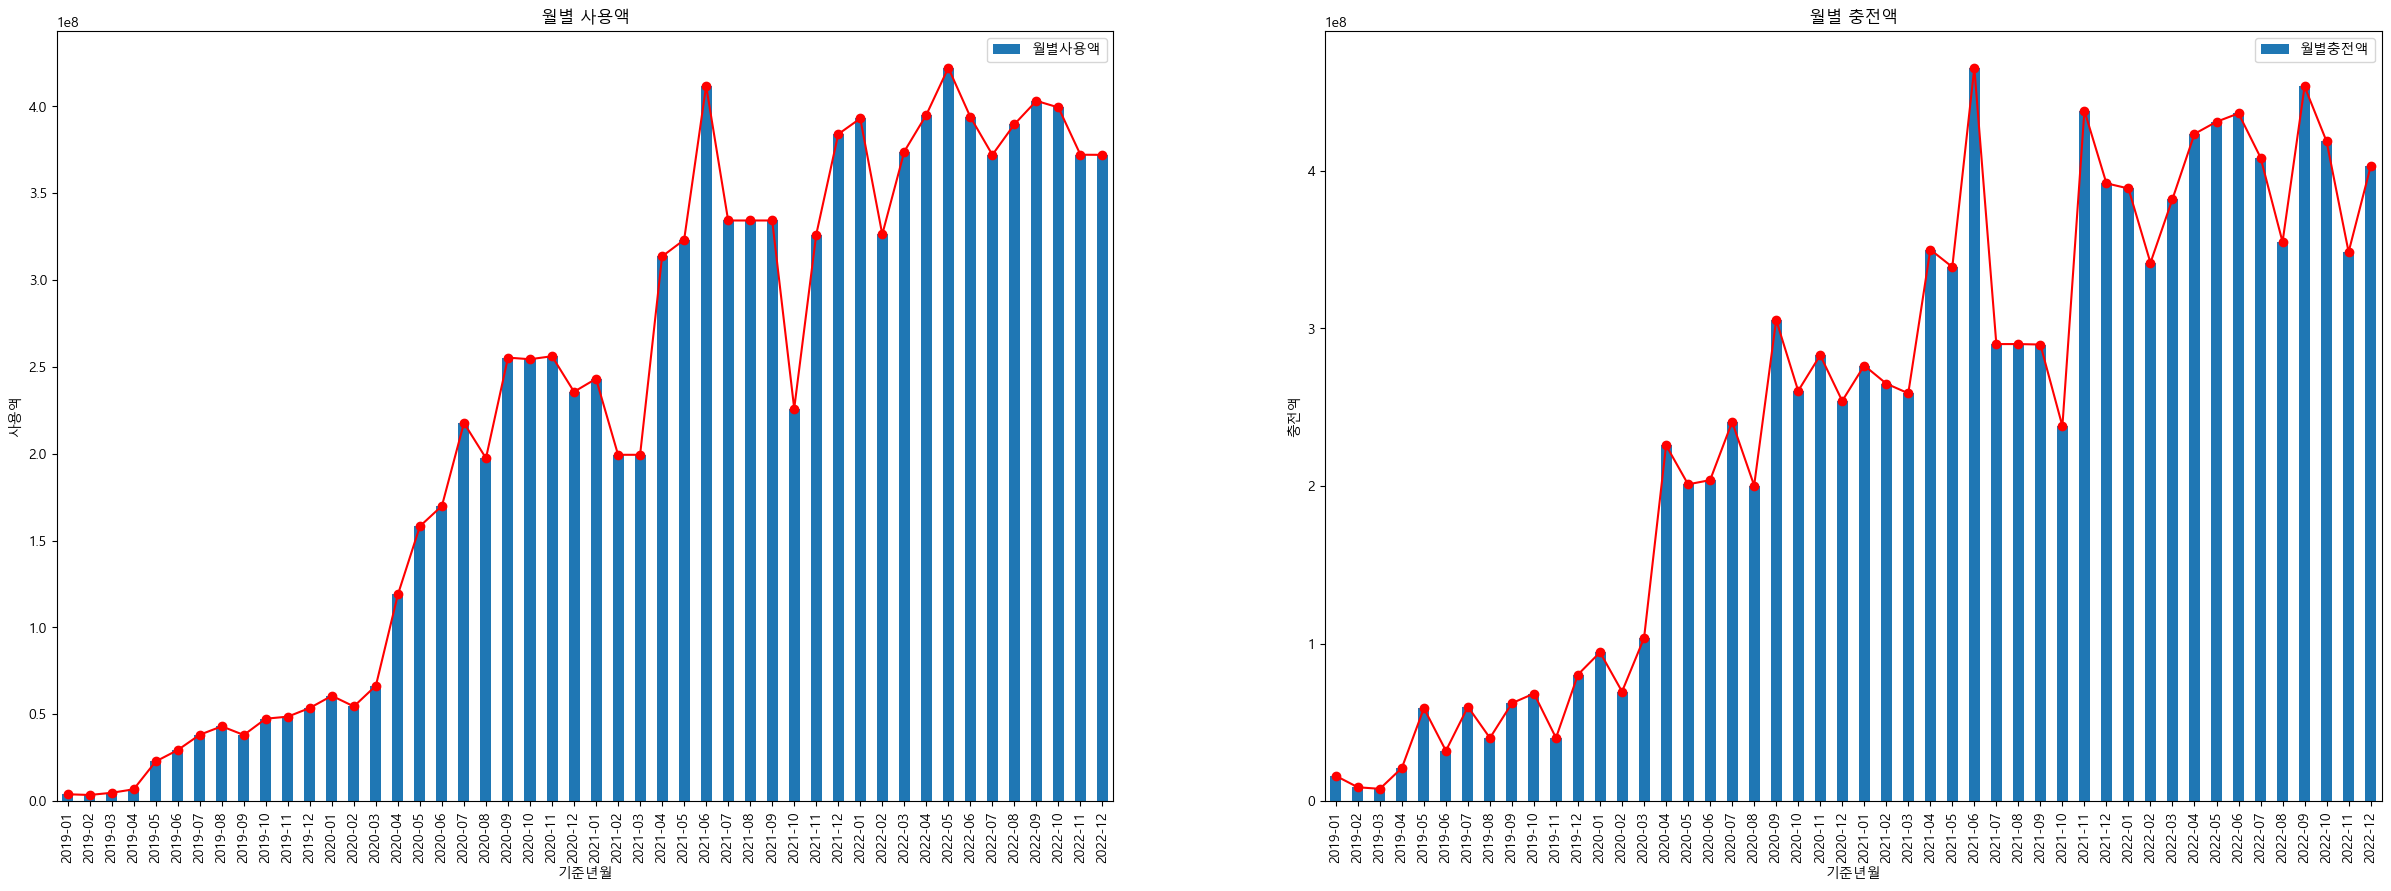

In [21]:
use1 = use.drop(columns=['월별충전액']) #사용액별 사용금액
use2 = use.drop(columns=['월별사용액']) #충전액별 사용금액


a= use1.groupby('기준년월').sum()
b= use2.groupby('기준년월').sum()

fig, ax = plt.subplots(ncols=2)
a.plot(kind='bar', figsize=(30, 10), ax=ax[0], ylabel='사용액', title='월별 사용액')
ax[0].plot(a, '-o', color='red')  # a 그래프에 선 그래프 추가
b.plot(kind='bar', figsize=(30, 10), ax=ax[1], ylabel='충전액', title='월별 충전액')
ax[1].plot(b, '-o', color='red')  # b 그래프에 선 그래프 추가


#2020 4월부터 사용액,충전액 둘다 급격히 증가했던걸 알수있었다.

<h3>2. 연령대와 성별에 따른 결제 건수 및 금액 분석</h3>

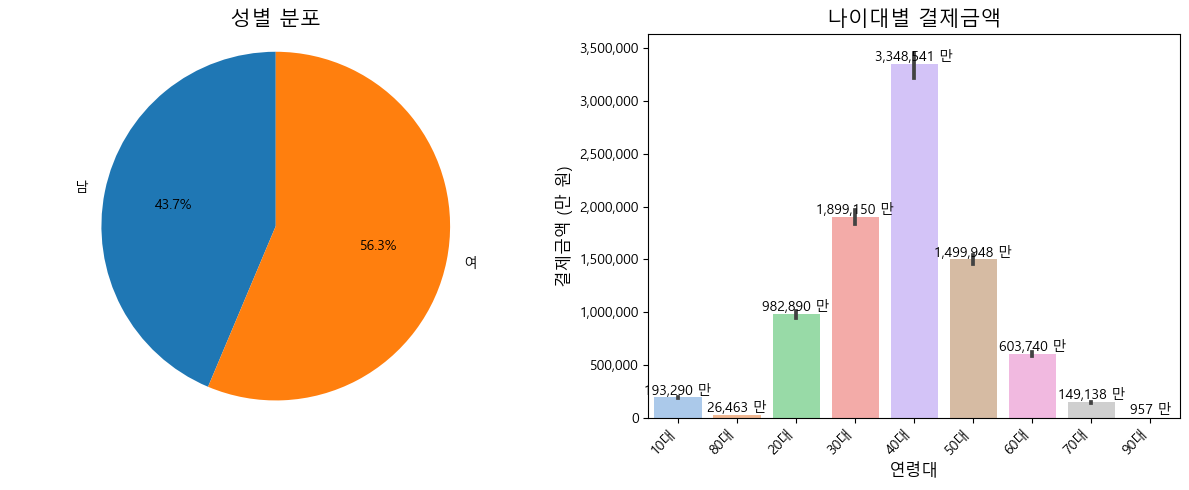

In [22]:
# 성별 결제금액 그래프
gender = age_gender.drop(columns=['시군명', '연령대', '결제건수'])
gender1 = gender.groupby('성별').sum()

# 성별 비율 계산
gender_ratio = gender1['결제금액'] / gender1['결제금액'].sum()

# Seaborn을 사용하여 파이차트 생성
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# 성별 분포 파이차트
axs[0].pie(gender_ratio, labels=gender1.index, autopct='%1.1f%%', startangle=90)
axs[0].axis('equal')
axs[0].set_title('성별 분포', fontsize=15)

#-------------------------------------------------------------------------------------------------------------

# 나이대별 결제금액 그래프
age = age_gender.drop(columns=['시군명', '성별', '결제건수'])
age1 = age.groupby('연령대').sum()

age1.sort_values('결제금액', ascending=False)

# 파스텔 색상 팔레트 설정
colors = sns.color_palette("pastel")

# 나이대별 막대그래프
sns.barplot(x='연령대', y='결제금액', data=age, palette=colors, ax=axs[1])

# 축 레이블과 제목 설정
axs[1].set_xlabel('연령대', fontsize=12)
axs[1].set_ylabel('결제금액 (만 원)', fontsize=12)
axs[1].set_title('나이대별 결제금액', fontsize=15)

# x축 눈금 레이블 회전
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# 막대그래프 위에 금액 표시 (만 단위)
for p in axs[1].patches:
    axs[1].annotate(format(p.get_height() / 10000, ',.0f') + ' 만',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# y축에 천 단위 구분을 위한 포맷 설정
axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x) / 10000, ',.0f')))

# 그래프 표시
plt.tight_layout()
plt.show()


# 전체적인 성별분포를 볼때 여성이 좀 더 많았지만 큰 차이는 나지 않았다.
#나이대별 결제금액을 보았을때 40대가 압도적으로 많았고 그 뒤로는 30대, 50대였다 . - 80,90대는 결제금액이 상당히 적은편이었다.

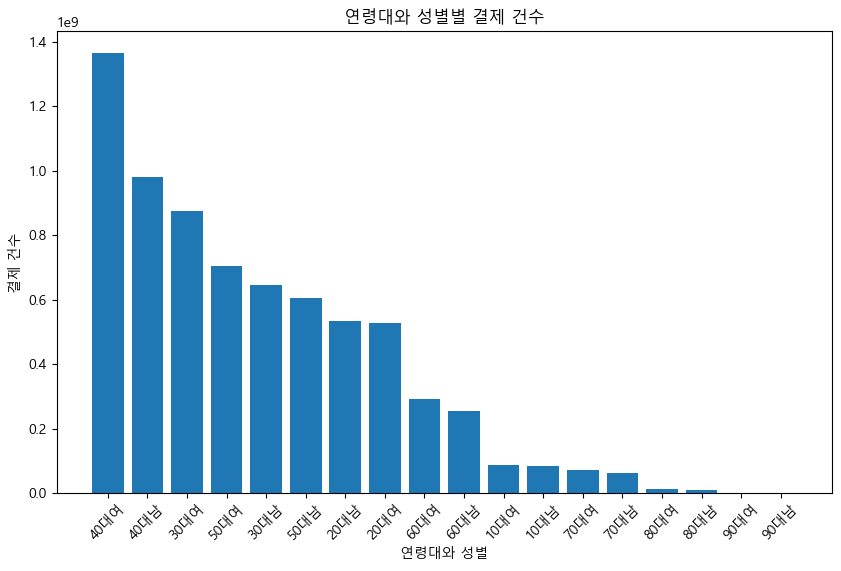

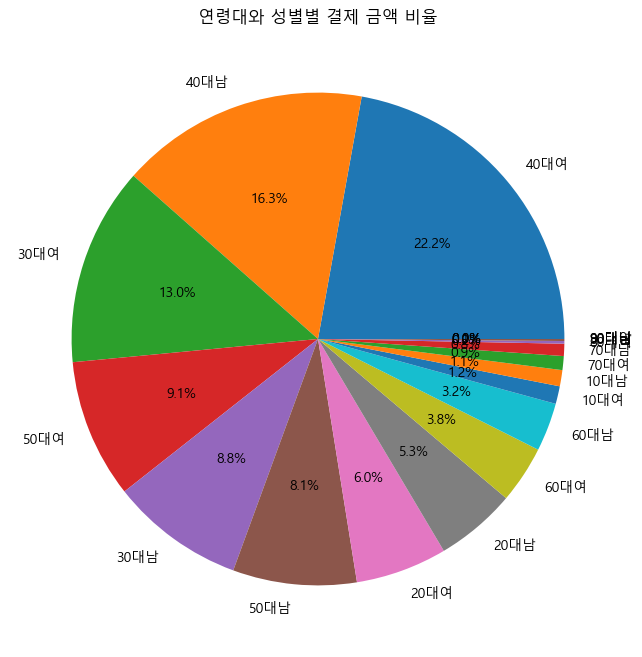

In [23]:
# 연령대와 성별을 기준으로 그룹화하여 결제 건수와 결제 금액의 합계 계산
grouped = agegender.groupby(['연령대', '성별']).agg({'결제건수': 'sum', '결제금액': 'sum'}).reset_index()

# 결제 건수를 기준으로 내림차순 정렬
sorted_grouped = grouped.sort_values(by='결제건수', ascending=False)

# 막대 그래프로 결제 건수 시각화
plt.figure(figsize=(10, 6))
plt.bar(sorted_grouped['연령대'] + sorted_grouped['성별'], sorted_grouped['결제건수'])
plt.xlabel('연령대와 성별')
plt.ylabel('결제 건수')
plt.title('연령대와 성별별 결제 건수')
plt.xticks(rotation=45)
plt.show()

# 결제 금액을 기준으로 내림차순 정렬
sorted_grouped_amount = grouped.sort_values(by='결제금액', ascending=False)

# 원 그래프로 결제 금액 시각화
plt.figure(figsize=(8, 8))
plt.pie(sorted_grouped_amount['결제금액'], labels=sorted_grouped_amount['연령대'] + sorted_grouped_amount['성별'], autopct='%.1f%%')
plt.title('연령대와 성별별 결제 금액 비율')
plt.show()

# 연령대 성별을 합쳐 보았을때이다.

<h3>2. 지역별(시군별) 사용 분석</h3>

#지역별 사용금액 (use데이터사용)

use3 = use1.drop(columns=['기준년월'])

c = use1.groupby('시군명').sum()

c.sort_values('월별사용액',ascending=False)

결과 -> !!오류 김포와 시흥 월별 사용액이 0이라고 나옴 -> 지역별 사용금액은 age_gender데이터를 사용하기로함.

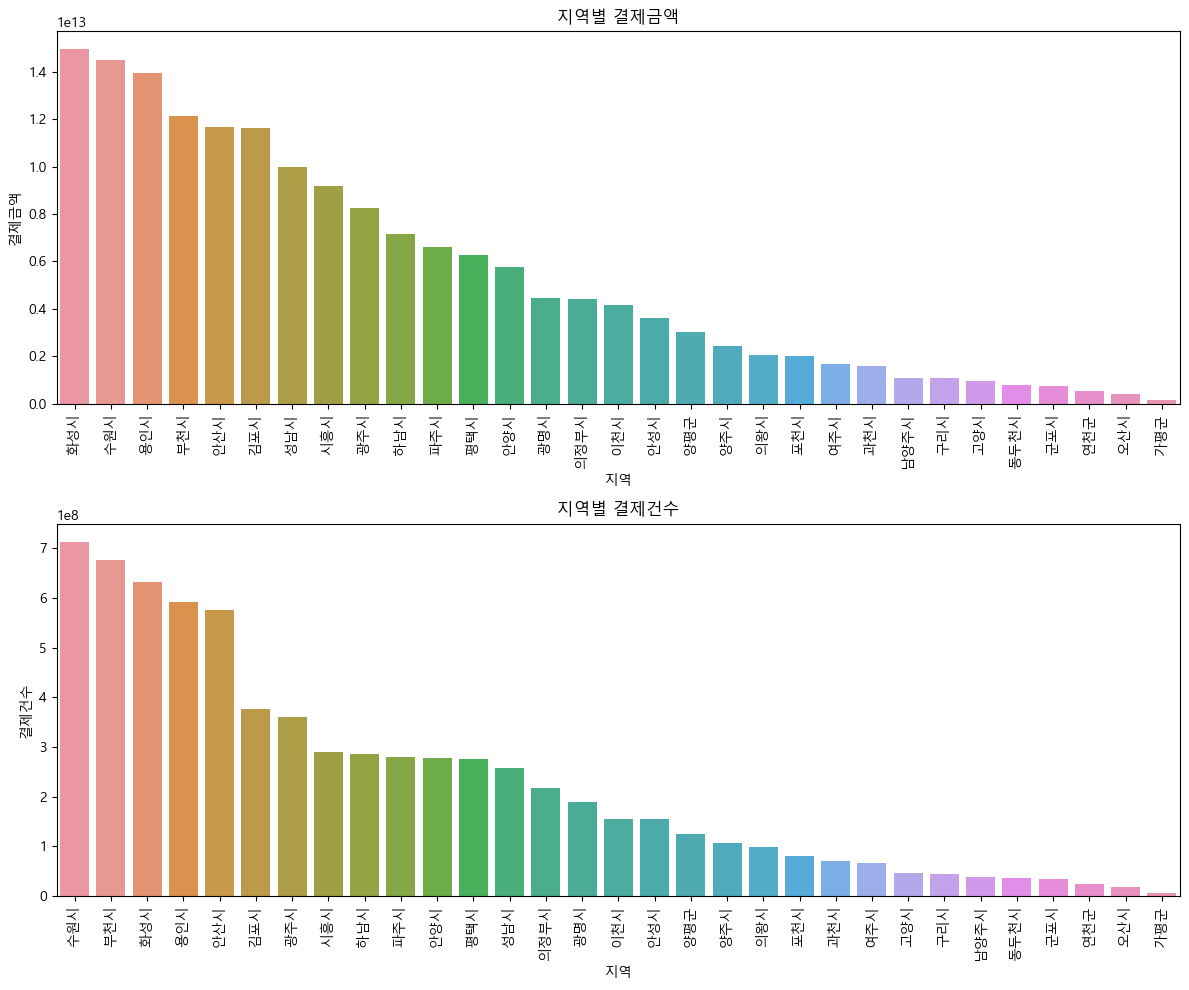

In [24]:
# 지역별 결제금액 분석
payment_by_region = age_gender.groupby('시군명')['결제금액'].sum().sort_values(ascending=False)

# 지역별 결제건수 분석
transactions_by_region = age_gender.groupby('시군명')['결제건수'].sum().sort_values(ascending=False)

# 시각화
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# 결제금액 시각화 (막대 그래프)
sns.barplot(x=payment_by_region.index, y=payment_by_region.values, ax=axes[0])
axes[0].set_title('지역별 결제금액')
axes[0].set_xlabel('지역')
axes[0].set_ylabel('결제금액')

# 결제건수 시각화 (막대 그래프)
sns.barplot(x=transactions_by_region.index, y=transactions_by_region.values, ax=axes[1])
axes[1].set_title('지역별 결제건수')
axes[1].set_xlabel('지역')
axes[1].set_ylabel('결제건수')

# x축 라벨 회전
for ax in axes:
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#지역별 결제금액을 봤을때 화성시가 제일 높았고, 가평군이 제일 낮았다
#결제 건수로 보았을때는 수원시가 가장 높았고 가평군은 여전히 낮았다

In [25]:
#데이터프레임 형식으로 순위별 보기

# 결제금액 데이터프레임 생성
payment_df = pd.DataFrame({'지역': payment_by_region.index, '결제금액': payment_by_region.values})
payment_df['결제금액(억)'] = payment_df['결제금액'] // 1e8  # 천만(1억) 단위로 변경
payment_df['순위'] = range(1, len(payment_df) + 1)
payment_df = payment_df[['순위', '지역', '결제금액(억)']].sort_values('결제금액(억)', ascending=False)
payment_df['결제금액(억)'] = payment_df['결제금액(억)'].apply(lambda x: '{:,.0f}'.format(x))

# 결제건수 데이터프레임 생성
transactions_df = pd.DataFrame({'지역': transactions_by_region.index, '결제건수': transactions_by_region.values})
transactions_df['순위'] = range(1, len(transactions_df) + 1)
transactions_df = transactions_df[['순위', '지역', '결제건수']].sort_values('결제건수', ascending=False)
transactions_df['결제건수'] = transactions_df['결제건수'].apply(lambda x: '{:,.0f}'.format(x))

print("지역별 결제금액")
print(payment_df.to_string(index=False))
print()

print("지역별 결제건수")
print(transactions_df.to_string(index=False))

지역별 결제금액
 순위   지역 결제금액(억)
  1  화성시 149,554
  2  수원시 144,794
  3  용인시 139,362
  4  부천시 121,422
  5  안산시 116,539
  6  김포시 116,173
  7  성남시  99,659
  8  시흥시  91,998
  9  광주시  82,666
 10  하남시  71,739
 11  파주시  66,249
 12  평택시  62,682
 13  안양시  57,793
 14  광명시  44,548
 15 의정부시  44,166
 16  이천시  41,625
 17  안성시  36,042
 18  양평군  30,419
 19  양주시  24,436
 20  의왕시  20,383
 21  포천시  20,121
 22  여주시  16,784
 23  과천시  15,695
 24 남양주시  10,834
 25  구리시  10,829
 26  고양시   9,626
 27 동두천시   7,959
 28  군포시   7,453
 29  연천군   5,329
 30  오산시   3,934
 31  가평군   1,393

지역별 결제건수
 순위   지역        결제건수
  1  수원시 713,682,868
  2  부천시 676,942,800
  3  화성시 631,965,592
  4  용인시 591,128,504
  5  안산시 575,309,576
  6  김포시 375,880,684
  7  광주시 359,955,336
  8  시흥시 290,443,032
  9  하남시 286,637,384
 10  파주시 280,697,964
 11  안양시 279,044,852
 12  평택시 276,124,424
 13  성남시 257,249,296
 14 의정부시 218,462,160
 15  광명시 190,100,464
 16  이천시 155,789,108
 17  안성시 155,281,484
 18  양평군 124,591,292
 19  양주시 106,958,008
 20  의왕시  98,987,

<h3>3. 업종별 가맹점 분석</h3>

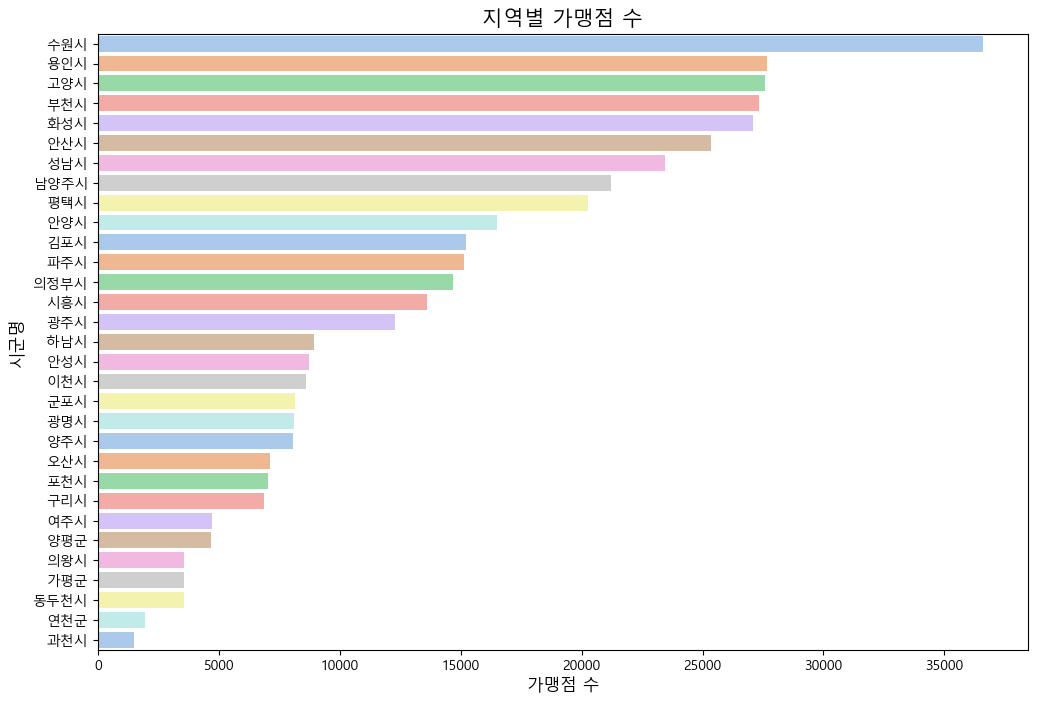

In [26]:
# 지역별 가맹점 수 

# 시군명별 업종 개수 계산
count_data = store.groupby('시군명')['업종명'].count().sort_values(ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x=count_data.values, y=count_data.index, palette='pastel')

# 축 레이블과 제목 설정
plt.xlabel('가맹점 수', fontsize=12)
plt.ylabel('시군명', fontsize=12)
plt.title('지역별 가맹점 수', fontsize=15)

# 그래프 표시
plt.show()

#지역별 가맹점 수를 보았을때 수원시가 가장 많았고 과천시의 가맹점수는 적었다.

In [27]:
# 지역별 가맹점수가 지역별 결제금액에 영향을 미치는지 상관계수 확인
import scipy.stats as stats

# store 데이터에서 시군명별 업종 개수 계산
store_grouped = store.groupby('시군명').size()

# age_gender 데이터에서 시군명별 결제금액 계산
age_gender_grouped = age_gender.groupby('시군명')['결제금액'].sum()

# 두 데이터의 상관 계수 계산
correlation = stats.pearsonr(store_grouped, age_gender_grouped)

# 결과 출력
print("상관 계수:", correlation[0])
print("p-value:", correlation[1])


#상관 계수 값이 0.759로 높고 p-value가 매우 작으므로, 시군명별 업종 개수와 시군명별 결제금액 간에는 강한 양의 선형적인 관계가 있다고 해석할 수 있습니다.

상관 계수: 0.7590350355080804
p-value: 7.44315166355586e-07


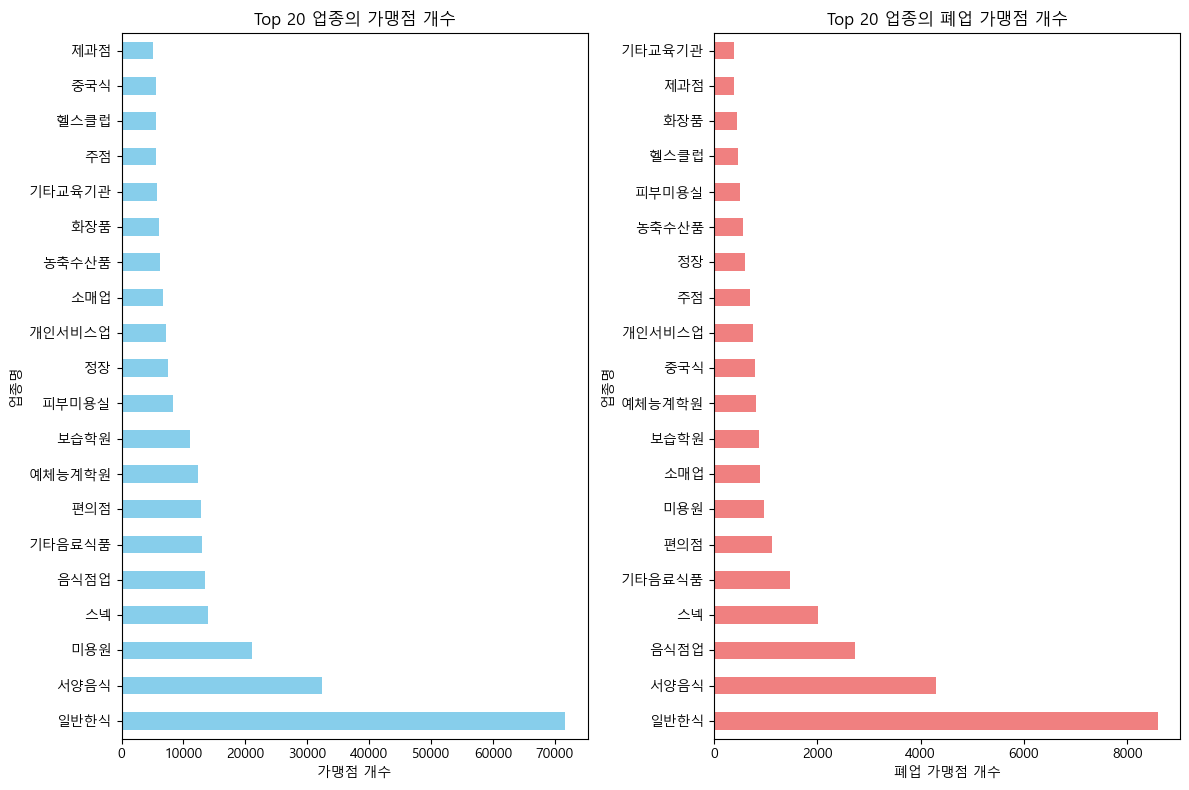

In [28]:
#지역화폐 가맹점 업종 알아보기

# 업종별 가맹점 개수 계산
count_by_category = store['업종명'].value_counts().nlargest(20)  # 상위 20개 업종 선택

# 업종별 폐업 가맹점 개수 계산
closed_count_by_category = store[store['업종명'].isin(count_by_category.index) & (store['휴폐업상태'] == '폐업자')]['업종명'].value_counts()

# 가맹점 개수 시각화 (수평 막대 그래프)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
count_by_category.plot(kind='barh', color='skyblue')
plt.title('Top 20 업종의 가맹점 개수')
plt.xlabel('가맹점 개수')
plt.ylabel('업종명')

# 폐업 가맹점 개수 시각화 (수평 막대 그래프)
plt.subplot(1, 2, 2)
closed_count_by_category.plot(kind='barh', color='lightcoral')
plt.title('Top 20 업종의 폐업 가맹점 개수')
plt.xlabel('폐업 가맹점 개수')
plt.ylabel('업종명')

plt.tight_layout()
plt.show()

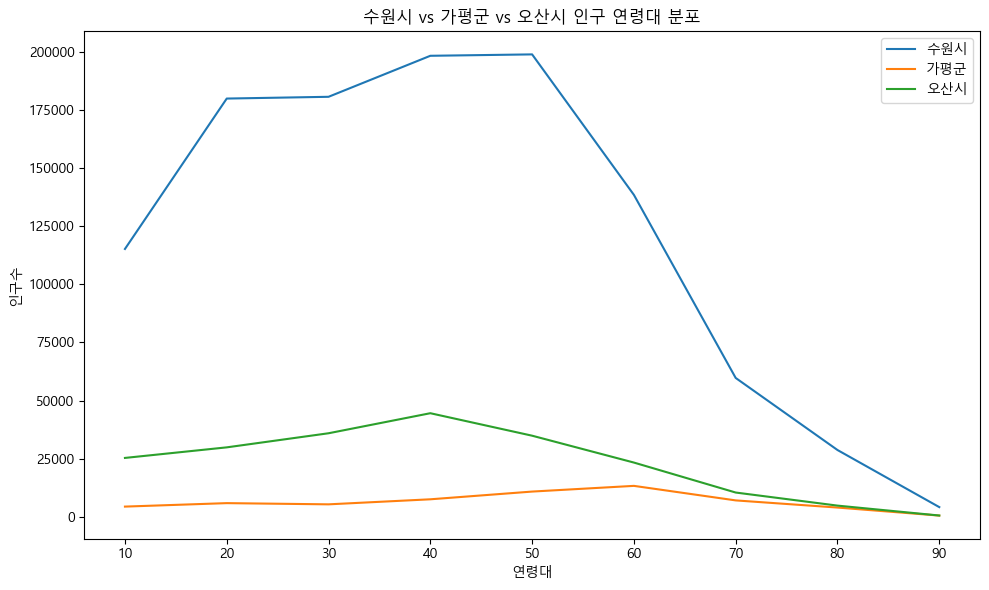

In [29]:
# 수원시와 가평군 데이터 추출
suwon_data = people[people['시군별'] == '수원시']
gapyeong_data = people[people['시군별'] == '가평군']
osan_data = people[people['시군별'] == '오산시']

# 연령대별 인구수 합산
suwon_age_group = suwon_data.groupby('연령대')['인구수'].sum()
gapyeong_age_group = gapyeong_data.groupby('연령대')['인구수'].sum()
osan_age_group = osan_data.groupby('연령대')['인구수'].sum()

# 수원시, 가평군, 오산시 인구 연령대 분포 비교 시각화
age_groups = suwon_age_group.index

plt.figure(figsize=(10, 6))

plt.plot(age_groups, suwon_age_group, label='수원시')
plt.plot(age_groups, gapyeong_age_group, label='가평군')
plt.plot(age_groups, osan_age_group, label='오산시')

plt.xlabel('연령대')
plt.ylabel('인구수')
plt.title('수원시 vs 가평군 vs 오산시 인구 연령대 분포')
plt.legend()

plt.tight_layout()
plt.show()


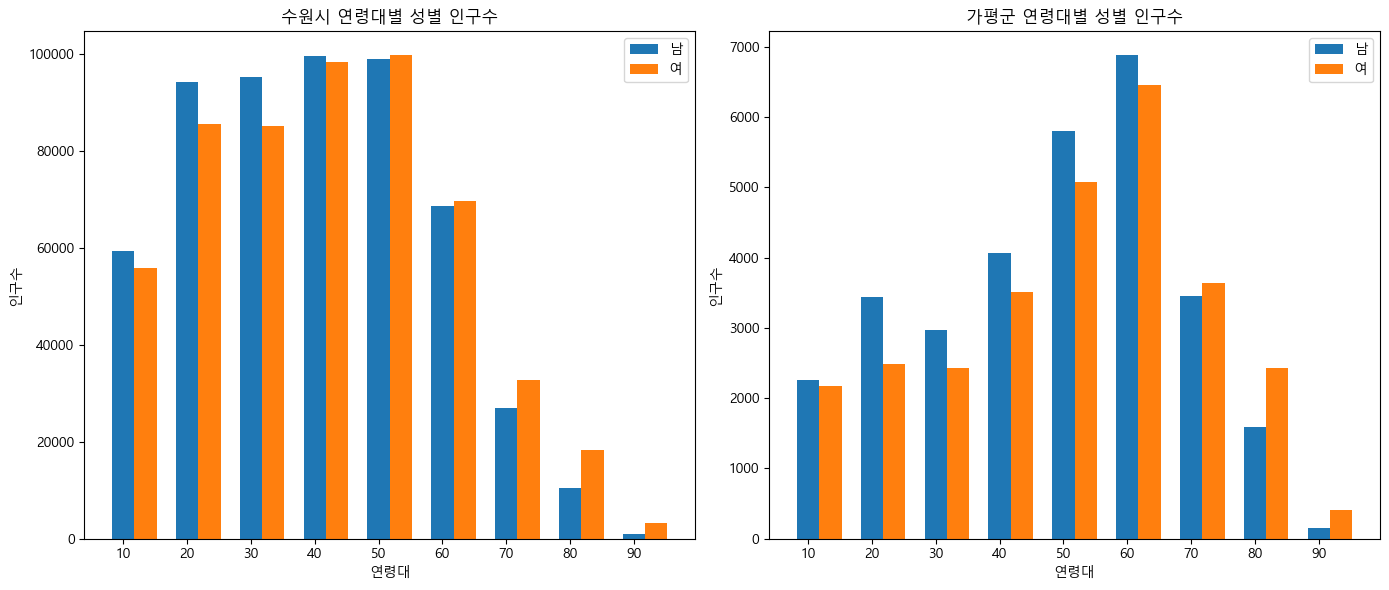

In [30]:
# 연령대별 성별 인구수 데이터 추출
suwon_age_gender_data = suwon_data.pivot(index='연령대', columns='성별', values='인구수')
gapyeong_age_gender_data = gapyeong_data.pivot(index='연령대', columns='성별', values='인구수')

# 그래프 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  # 크기 조정

# 수원시 연령대별 성별 인구수 막대 그래프
x = suwon_age_gender_data.index
x_ticks = list(range(len(x)))
width = 0.35

for i, gender in enumerate(suwon_age_gender_data.columns):
    axes[0].bar([tick + i * width for tick in x_ticks], suwon_age_gender_data[gender], width=width, label=gender)

axes[0].set_xlabel('연령대')
axes[0].set_ylabel('인구수')
axes[0].set_title('수원시 연령대별 성별 인구수')
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels(x)
axes[0].legend()

# 가평군 연령대별 성별 인구수 막대 그래프
x = gapyeong_age_gender_data.index
x_ticks = list(range(len(x)))

for i, gender in enumerate(gapyeong_age_gender_data.columns):
    axes[1].bar([tick + i * width for tick in x_ticks], gapyeong_age_gender_data[gender], width=width, label=gender)

axes[1].set_xlabel('연령대')
axes[1].set_ylabel('인구수')
axes[1].set_title('가평군 연령대별 성별 인구수')
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels(x)
axes[1].legend()

plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [31]:
suwon_sorted_data = suwon_data.sort_values(by='인구수', ascending=False)
suwon_sorted_data = suwon_sorted_data.reset_index(drop=True)
suwon_sorted_data = suwon_sorted_data.drop('시군별', axis=1)
suwon_sorted_data

,성별,연령대,인구수
0,여,50,99790
1,남,40,99786
2,남,50,99085
3,여,40,98489
4,남,30,95345
5,남,20,94242
6,여,20,85641
7,여,30,85296
8,여,60,69830
9,남,60,68637


In [32]:
gapyeong_sorted_data = gapyeong_data.sort_values(by='인구수', ascending=False)
gapyeong_sorted_data = gapyeong_sorted_data.reset_index(drop=True)
gapyeong_sorted_data = gapyeong_sorted_data.drop('시군별', axis=1)
gapyeong_sorted_data

,성별,연령대,인구수
0,남,60,6879
1,여,60,6465
2,남,50,5811
3,여,50,5080
4,남,40,4064
5,여,70,3644
6,여,40,3505
7,남,70,3451
8,남,20,3438
9,남,30,2969
